<a href="https://colab.research.google.com/github/aman2802/Optimization/blob/master/Medical_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries Needed for Task

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline

Read "13.ppm" file and save a copy

In [ ]:
image = cv2.imread('13.ppm')
i = Image.open("13.ppm").save("13.jpg")
img = cv2.imread('13.jpg')

Split image into Red, Green, Blue channels



In [ ]:
red = np.zeros(shape=(605,700))
green = np.zeros(shape=(605,700))
blue = np.zeros(shape=(605,700))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        red[i][j] = image[i][j][0]
        green[i][j] = image[i][j][1]
        blue[i][j] = image[i][j][2]

**Translate Image**

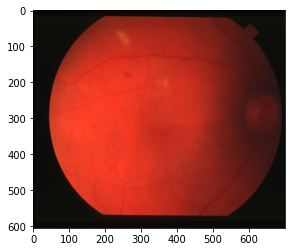

In [ ]:
height, width = img.shape[:2] 
  
tx = 4.5
ty = 3.4

T = np.float32([[1, 0, tx], [0, 1, ty]])   

img_translation = cv2.warpAffine(image, T, (width, height)) 
plt.imshow(cv2.cvtColor(img_translation,cv2.COLOR_BGR2RGB))

Define function to **Rotate** image

In [ ]:
def rotate_bound(image, angle):
    # Find dimensions of image
    # determine the center
    (h, w) = image.shape[:2]
    (Xi, Yi) = (w // 2, h // 2)
    
    # To rotation matrix, take negative of the angle to rotate clockwise), 
    #Calculate Sine and Cosine
    #Rotation components of the matrix
    M = cv2.getRotationMatrix2D((Xi, Yi), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    # New dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # Rotation matrix to consider translation
    M[0, 2] += (nW / 2) - Xi
    M[1, 2] += (nH / 2) - Yi
    # Roatate
    return cv2.warpAffine(image, M, (nW, nH))

Rotate Image by 35 deg

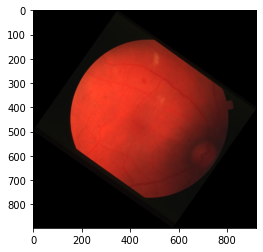

In [ ]:
img_rotate35 = rotate_bound(img, 35)
plt.imshow(cv2.cvtColor(img_rotate35,cv2.COLOR_BGR2RGB)) 

Rotate Image by -125 deg

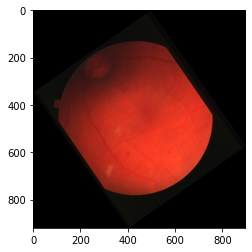

In [ ]:
img_rotate_125 = rotate_bound(img, -125)
plt.imshow(cv2.cvtColor(img_rotate_125,cv2.COLOR_BGR2RGB))

A function **scaling(image, scale)** has been defined, which applys bilinear interpolation of scaling images.
* The function takes in only 2D image for interpolation i.e only one channel of the image.
* For scaling, each channel of the image is passed into the function one at a time

In [ ]:
def scaling(image, scale):
    """
    `image` is a 2-D numpy array
    `height` and `width` are the desired spatial dimension of the new 2-D array.
    """
    width = math.floor(image.shape[1]*scale)
    height = math.floor(image.shape[0]*scale)
    img_height, img_width = image.shape[:2]

    new_size = np.empty([height, width])

    x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
    y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0

    for i in range(height):
        for j in range(width):
            x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
            x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

            x_w = (x_ratio * j) - x_l
            y_w = (y_ratio * i) - y_l

            a = image[y_l, x_l]
            b = image[y_l, x_h]
            c = image[y_h, x_l]
            d = image[y_h, x_h]

            pixel = a * (1 - x_w) * (1 - y_w) + b * x_w * (1 - y_w) + c * y_w * (1 - x_w) + d * x_w * y_w
            new_size[i][j] = pixel

    return new_size

* Red, Green, Blue each of the channels of the image is being Scaled, using bilinear interpolation
* The channels are combined to form the scaled image
* The scaled image has been saved with the name "Scaling by 0.4.png"
* The scaled image is being displayed

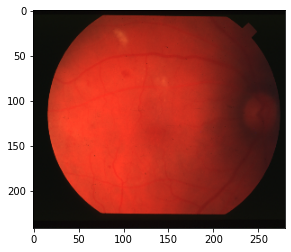

In [ ]:
scaled_red = scaling(red, 0.4)
scaled_green = scaling(green, 0.4)
scaled_blue = scaling(blue, 0.4)

scaled_image = np.zeros(shape=(242,280,3))

for i in range(scaled_red.shape[0]):
    for j in range(scaled_red.shape[1]):
        scaled_image[i][j][0] = scaled_red[i][j]
        scaled_image[i][j][1] = scaled_green[i][j]
        scaled_image[i][j][2] = scaled_blue[i][j]

cv2.imwrite('Scaling by 0.4.png', scaled_image)

pil_image = Image.open('Scaling by 0.4.png')
plt.imshow(pil_image)

* Red, Green, Blue each of the channels of the image is being Scaled, using bilinear interpolation
* The channels are combined to form the scaled image
* The scaled image has been saved with the name "Scaling by 1.4.png"
* The scaled image is being displayed

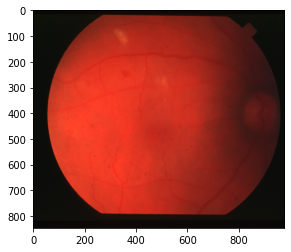

In [ ]:
scaled_red = scaling(red, 1.4)
scaled_green = scaling(green, 1.4)
scaled_blue = scaling(blue, 1.4)

#scaled_blue.shape,3
scaled_image = np.zeros(shape=(847,979,3))

for i in range(scaled_red.shape[0]):
    for j in range(scaled_red.shape[1]):
        scaled_image[i][j][0] = scaled_red[i][j]
        scaled_image[i][j][1] = scaled_green[i][j]
        scaled_image[i][j][2] = scaled_blue[i][j]

cv2.imwrite('Scaling by 1.4.png', scaled_image)

pil_image = Image.open('Scaling by 1.4.png')
plt.imshow(pil_image)

Plot Histogram of the Original Image

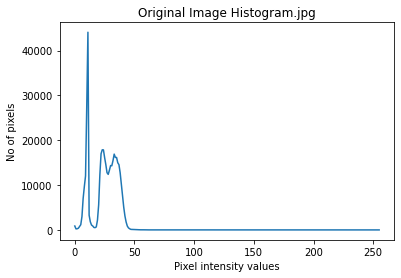

In [ ]:
hist = cv2.calcHist([img],[0], None, [256], [0,256])
plt.plot(hist)
plt.xlabel('Pixel intensity values')
plt.ylabel('No of pixels')
plt.title('Original Image Histogram.jpg')
plt.show()

Plot of Histogram for Each Channel R G B

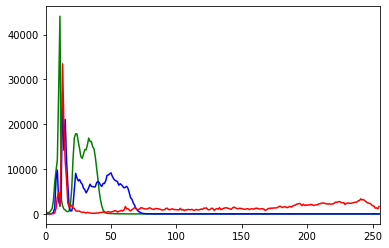

In [ ]:

color = {'b','g','r'}
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

**Histogram** **Equalization**

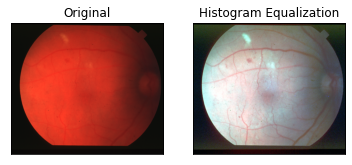

In [ ]:
image = Image.open('13.ppm')
image_eq = ImageOps.equalize(image, mask=None)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_eq),plt.title('Histogram Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

Plot after Histogram Equalization

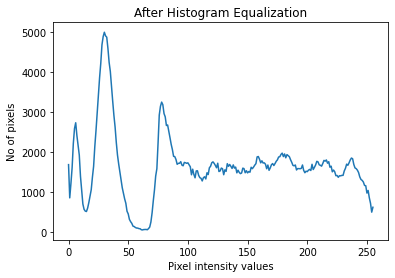

In [ ]:
image_eq.save("Histogram Equalization.jpg")
img_eq = cv2.imread('Histogram Equalization.jpg')

hist = cv2.calcHist([img_eq],[0], None, [256], [0,256])
plt.plot(hist)
plt.xlabel('Pixel intensity values')
plt.ylabel('No of pixels')
plt.title('After Histogram Equalization')
plt.show()

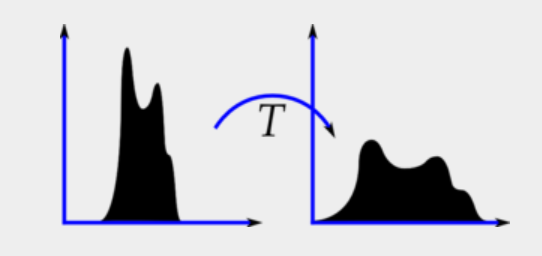

Histogram Equalization for Grayscale image

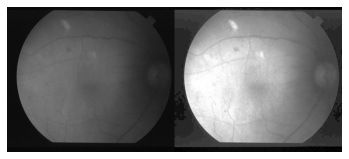

In [ ]:
#Histogram Equalization for Grayscale image
img2 = cv2.imread('13.jpg',0)
equ = cv2.equalizeHist(img2)
res = np.hstack((img2, equ))
plt.axis("off")
plt.imshow(res, cmap= 'gray')
plt.show()

Plot Histogram after Grayscale Equalization

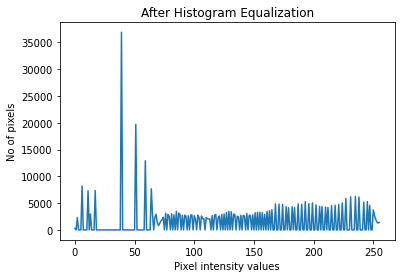

In [ ]:
hist = cv2.calcHist([equ],[0], None, [256], [0,256])
plt.plot(hist)
plt.xlabel('Pixel intensity values')
plt.ylabel('No of pixels')
plt.title('After Histogram Equalization')
plt.show()

Defining function to add **Salt & Pepper** and **Gaussian Noise**

In [ ]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 1
      out = np.copy(image)
      #Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      #Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

Defining function to calculate **Peak Signal to Noise Ratio (PSNR)**

In [ ]:
from math import log10, sqrt 
  
def PSNR(image1, image2): 
    mse = np.mean((image1 - image2) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

Defining **CLAHE** funtion

In [ ]:
def clahe():
  img = cv2.imread('tsukuba_1.png', 0)
  clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
  cll = clahe.apply(img)

Add **Salt & Pepper** Noise of 0.05 magnitude

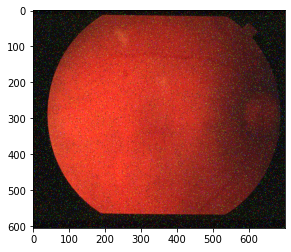

In [ ]:
from skimage.util import random_noise
noise_img1 = random_noise(img, mode='s&p',amount=0.05)
noise_img1 = np.array(255*noise_img1, dtype = 'uint8')
 
# Display the noise image
plt.imshow(cv2.cvtColor(noise_img1,cv2.COLOR_BGR2RGB))

Add **Salt & Pepper** Noise of 0.1 magnitude

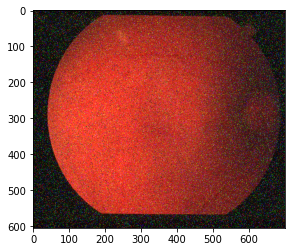

In [ ]:
noise_img2 = random_noise(img, mode='s&p',amount=0.1)
noise_img2 = np.array(255*noise_img2, dtype = 'uint8')
 
# Display the noise image
plt.imshow(cv2.cvtColor(noise_img2,cv2.COLOR_BGR2RGB))

Mean, Median, Gaussian Filters respective on Salt & Pepper Noise, 0.05 magnitude

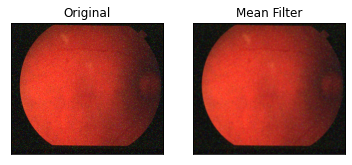

PSNR = 32.23373930830202


In [ ]:
blur = cv2.blur(noise_img1,(5,5))
plt.subplot(121),plt.imshow(cv2.cvtColor(noise_img1,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)),plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()

print("PSNR =", PSNR(img, blur))
p_mean = []
p_mean.append(PSNR(img, blur))

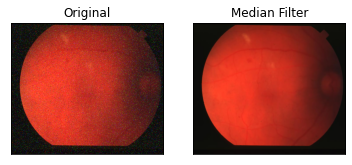

PSNR = 46.71372872614525


In [ ]:
median = cv2.medianBlur(noise_img1,5)

plt.subplot(121),plt.imshow(cv2.cvtColor(noise_img1,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(median,cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

print("PSNR =", PSNR(img, median))
p_md = []
p_md.append(PSNR(img, median))

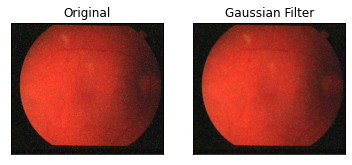

PSNR = 32.78835508993557


In [ ]:
g_blur = cv2.GaussianBlur(noise_img1,(5,5),0)

plt.subplot(121),plt.imshow(cv2.cvtColor(noise_img1,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(g_blur,cv2.COLOR_BGR2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, g_blur))
p_g = []
p_g.append(PSNR(img, g_blur))

Mean, Median, Gaussian Filters respective on Salt & Pepper Noise, 0.1 magnitude

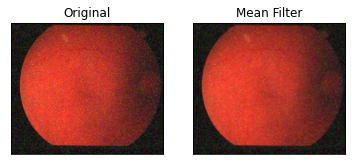

PSNR = 30.24709260849007


In [ ]:
blur = cv2.blur(noise_img2,(5,5))

plt.subplot(121),plt.imshow(cv2.cvtColor(noise_img2,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)),plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, blur))
p_mean.append(PSNR(img, blur))

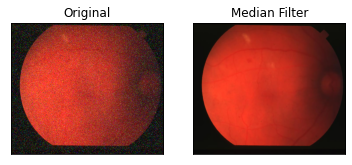

PSNR = 46.46443031700877


In [ ]:
median = cv2.medianBlur(noise_img2,5)

plt.subplot(121),plt.imshow(cv2.cvtColor(noise_img2,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(median,cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, median))
p_md.append(PSNR(img, median))

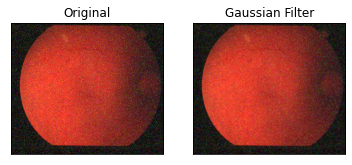

PSNR = 30.60558613051033


In [ ]:
g_blur = cv2.GaussianBlur(noise_img2,(5,5),0)

plt.subplot(121),plt.imshow(cv2.cvtColor(noise_img2,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(g_blur,cv2.COLOR_BGR2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, g_blur))
p_g.append(PSNR(img, g_blur))

Adding Gaussian Noise-1

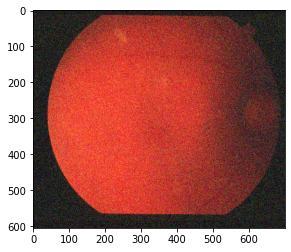

In [ ]:
# Generate Gaussian noise
g_noise_img1 = random_noise(img, mode='gaussian',mean=0.05, var=0.03)
g_noise_img1 = np.array(255*g_noise_img1, dtype = 'uint8')
 
# Display the noise image
plt.imshow(cv2.cvtColor(g_noise_img1,cv2.COLOR_BGR2RGB))

Adding Gaussian Noise-2

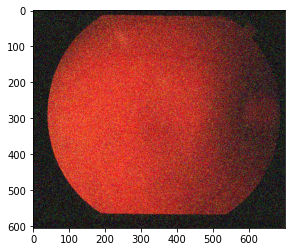

In [ ]:
# Generate Gaussian noise
g_noise_img2 = random_noise(img, mode='gaussian',mean=0, var=0.05)
g_noise_img2 = np.array(255*g_noise_img2, dtype = 'uint8')
 
# Display the noise image
plt.imshow(cv2.cvtColor(g_noise_img2,cv2.COLOR_BGR2RGB))

Mean, Median, Gaussian Filters respective on Gaussian Noise - 1

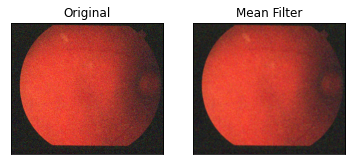

PSNR = 28.194999993765002


In [ ]:
blur = cv2.blur(g_noise_img1,(5,5))

plt.subplot(121),plt.imshow(cv2.cvtColor(g_noise_img1,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)),plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, blur))
p_mean.append(PSNR(img, blur))

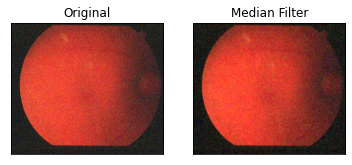

PSNR = 28.766597848548926


In [ ]:
median = cv2.medianBlur(g_noise_img1,5)

plt.subplot(121),plt.imshow(cv2.cvtColor(g_noise_img1,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(median,cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, median))
p_md.append(PSNR(img, median))

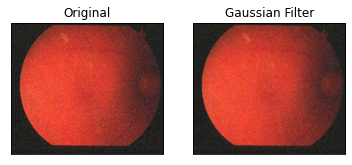

PSNR = 28.38119056117934


In [ ]:
g_blur = cv2.GaussianBlur(g_noise_img1,(5,5),0)

plt.subplot(121),plt.imshow(cv2.cvtColor(g_noise_img1,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(g_blur,cv2.COLOR_BGR2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, g_blur))
p_g.append(PSNR(img, g_blur)) 

Mean, Median, Gaussian Filters respective on Gaussian Noise - 2

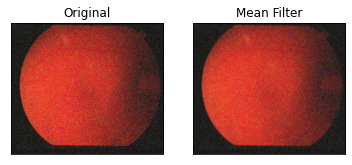

PSNR = 28.838666175571554


In [ ]:
blur = cv2.blur(g_noise_img2,(5,5))

plt.subplot(121),plt.imshow(cv2.cvtColor(g_noise_img2,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)),plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, blur))
p_mean.append(PSNR(img, blur))

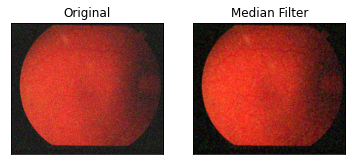

PSNR = 29.30966387136532


In [ ]:
median = cv2.medianBlur(g_noise_img2,5)

plt.subplot(121),plt.imshow(cv2.cvtColor(g_noise_img2,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(median,cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, median))
p_md.append(PSNR(img, median))

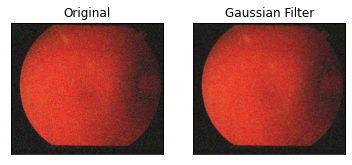

PSNR = 28.830447421279253


In [ ]:
g_blur = cv2.GaussianBlur(g_noise_img2,(5,5),0)

plt.subplot(121),plt.imshow(cv2.cvtColor(g_noise_img2,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(g_blur,cv2.COLOR_BGR2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()
print("PSNR =", PSNR(img, g_blur))
p_g.append(PSNR(img, g_blur))

View  Performace of the Filters on Noisy Images, by using **PSNR**

Also saves **PSNR.csv**

In [ ]:
performance = pd.DataFrame()
performance["Noise Type"] = ['Salt Pepper', 'Salt Pepper', 'Gaussian', 'Gaussian' ]
performance["PSNR Mean Filter+clahe"] = p_mean
performance["PSNR Gaussian Filter+clahe"] = p_g
performance["PSNR Median Filter+clahe"] = p_md
performance["Noise Mean"] = ['-', '-', 0.05, 0]
performance["Noise Varience"] = ['-', '-', 0.03, 0.05]
performance["Amount of Noise"] = [0.05, 0.1, '-', '-']

performance.to_csv('PSNR.csv')

In [ ]:
performance

,Noise Type,PSNR Mean Filter+clahe,PSNR Gaussian Filter+clahe,PSNR Median Filter+clahe,Noise Mean,Noise Varience,Amount of Noise
0,Salt Pepper,32.233739,32.788355,46.713729,-,-,0.05
1,Salt Pepper,30.247093,30.605586,46.464430,-,-,0.1
2,Gaussian,28.195000,28.381191,28.766598,0.05,0.03,-
3,Gaussian,28.838666,28.830447,29.309664,0,0.05,-
